<a href="https://colab.research.google.com/github/yeona98/MachineLearning_python/blob/main/evaluation%20basic/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Accuracy(정확도)**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




> **Dummy Classifier**


- titanic data

    여자면 생존(1), 남자면 사망(0)이라고 예측하였을 때의 Accuracy(정확도) 확인


In [2]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  # fit() 메소드는 아무것도 학습하지 않음.
  def fit(self, X, y=None):
    pass
  
  # predict() 메소드는 단순히 Sex feature가 1이면 0, 그렇지 않으면 1로 예측함.
  def predict(self, X):
    pred = np.zeros((X.shape[0], 1)) # 예측 결과를 위한 ndarray 초기화, shape[0]: data point의 개수
    for i in range(X.shape[0]) :
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else:
        pred[i] = 1

    return pred

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공학습
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_practice/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

# 학습 데이터/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


In [5]:
print(X_train.shape[0]) # data point 개수 (row)
print(X_train.shape[1]) # feature 개수 (column)

712
8


In [6]:
len(X_train)

712

> **Fake Classifier**

- MNIST data

    7이면 True(1), 7이 아니면 False(0)인 imbalance한 class를 가진 dataset을 모두 0으로 예측하였을 때의 Accuracy(정확도) 확인

In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  # fit() 메소드는 아무것도 학습하지 않음.
  def fit(self, X, y):
    pass
  
  # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool) # 예측 결과를 위한 ndarray 초기화, len(X): data point 개수

# 사이킷런의 내장 데이터 셋인 load_digit()를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [8]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [9]:
# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [10]:
# 불균형한 레이블 데이터 분포도 확인.
print('레이블 테스트 세트 크기: ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기:  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64


In [11]:
# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

모든 예측을 0으로 하여도 정확도는:0.900


# **Confusion Matrix**

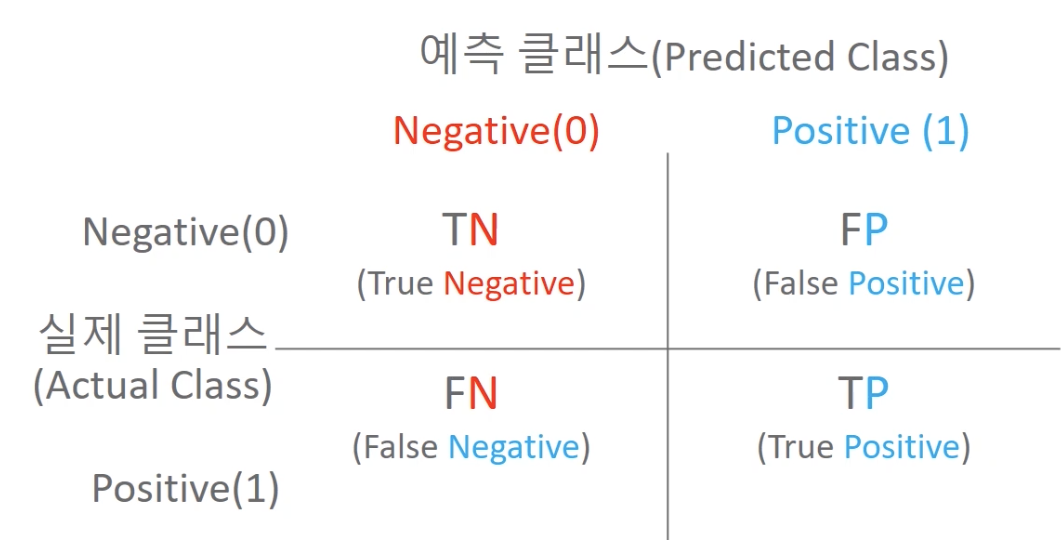

In [12]:
from sklearn.metrics import confusion_matrix

# FakeClassifier의 예측 결과인 fakepred와 실제 결과인 y_test의 confusion Matrix 출력
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

# **Precision(정밀도)와 Recall(재현율)**

> **MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정**

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Precision(정밀도):", precision_score(y_test, fakepred))
print("Recall(재현율):", recall_score(y_test, fakepred))

Precision(정밀도): 0.0
Recall(재현율): 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> **오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성**

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(ytest, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [15]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_practice/titanic/train.csv')
y_titanic_df = titanic_df['Survived'] 
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

# 학습 데이터/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **Precision/Recall Trade-off**

> **predict_proba() 메소드 확인**

In [16]:
# 예측 확률(0일 확률과 1일 확률)을 보여는주는 pred_proba() 메소드
pred_proba = lr_clf.predict_proba(X_test)
print(f"pred_proba()결과 Shape : {pred_proba.shape}")
print("pred_proba array에서 앞 3개만 샘플로 추출\n:", pred_proba[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출
: [[0.46191519 0.53808481]
 [0.878675   0.121325  ]
 [0.87716185 0.12283815]]


In [17]:
pred_proba

array([[0.46191519, 0.53808481],
       [0.878675  , 0.121325  ],
       [0.87716185, 0.12283815],
       [0.88263183, 0.11736817],
       [0.85515178, 0.14484822],
       [0.88224516, 0.11775484],
       [0.88842446, 0.11157554],
       [0.20873377, 0.79126623],
       [0.78273869, 0.21726131],
       [0.36948661, 0.63051339],
       [0.89981884, 0.10018116],
       [0.87495086, 0.12504914],
       [0.87715587, 0.12284413],
       [0.88837852, 0.11162148],
       [0.43652303, 0.56347697],
       [0.8589656 , 0.1410344 ],
       [0.90369596, 0.09630404],
       [0.73332741, 0.26667259],
       [0.72468096, 0.27531904],
       [0.1717132 , 0.8282868 ],
       [0.7535216 , 0.2464784 ],
       [0.61904909, 0.38095091],
       [0.85460009, 0.14539991],
       [0.81468326, 0.18531674],
       [0.8880075 , 0.1119925 ],
       [0.76543853, 0.23456147],
       [0.85965965, 0.14034035],
       [0.92586578, 0.07413422],
       [0.71948884, 0.28051116],
       [0.69539397, 0.30460603],
       [0.

In [18]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1])

In [19]:
pred.reshape(-1, 1)

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [20]:
# 예측 확률 array 와 예측 결과값 array를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print("두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n", pred_proba_result[:3])

두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46191519 0.53808481 1.        ]
 [0.878675   0.121325   0.        ]
 [0.87716185 0.12283815 0.        ]]


In [21]:
pred_proba_result

array([[0.46191519, 0.53808481, 1.        ],
       [0.878675  , 0.121325  , 0.        ],
       [0.87716185, 0.12283815, 0.        ],
       [0.88263183, 0.11736817, 0.        ],
       [0.85515178, 0.14484822, 0.        ],
       [0.88224516, 0.11775484, 0.        ],
       [0.88842446, 0.11157554, 0.        ],
       [0.20873377, 0.79126623, 1.        ],
       [0.78273869, 0.21726131, 0.        ],
       [0.36948661, 0.63051339, 1.        ],
       [0.89981884, 0.10018116, 0.        ],
       [0.87495086, 0.12504914, 0.        ],
       [0.87715587, 0.12284413, 0.        ],
       [0.88837852, 0.11162148, 0.        ],
       [0.43652303, 0.56347697, 1.        ],
       [0.8589656 , 0.1410344 , 0.        ],
       [0.90369596, 0.09630404, 0.        ],
       [0.73332741, 0.26667259, 0.        ],
       [0.72468096, 0.27531904, 0.        ],
       [0.1717132 , 0.8282868 , 1.        ],
       [0.7535216 , 0.2464784 , 0.        ],
       [0.61904909, 0.38095091, 0.        ],
       [0.

> **Binarizer 활용**

In [22]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0, 1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


> **분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환**

In [23]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값 = 분류 결정 임계값
custom_threshold = 0.5

# predict_proba() 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

pred_proba_1

array([[0.53808481],
       [0.121325  ],
       [0.12283815],
       [0.11736817],
       [0.14484822],
       [0.11775484],
       [0.11157554],
       [0.79126623],
       [0.21726131],
       [0.63051339],
       [0.10018116],
       [0.12504914],
       [0.12284413],
       [0.11162148],
       [0.56347697],
       [0.1410344 ],
       [0.09630404],
       [0.26667259],
       [0.27531904],
       [0.8282868 ],
       [0.2464784 ],
       [0.38095091],
       [0.14539991],
       [0.18531674],
       [0.1119925 ],
       [0.23456147],
       [0.14034035],
       [0.07413422],
       [0.28051116],
       [0.30460603],
       [0.94726724],
       [0.81728826],
       [0.12693739],
       [0.82615778],
       [0.39958028],
       [0.23456147],
       [0.072388  ],
       [0.61109487],
       [0.05295521],
       [0.10390978],
       [0.35096258],
       [0.08334761],
       [0.82174417],
       [0.70786635],
       [0.6304225 ],
       [0.63043881],
       [0.91883946],
       [0.358

In [24]:
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


> **분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 변환**

In [26]:
# Binarizer의 threshold 설정값을 0.4로 설정 = 분류 결정 임계값 0.5 -> 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


> **여러 개의 분류 결정 임계값을 변경하면서 Binarizer를 이용하여 예측값 변환**

In [27]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print("임곗값:", custom_threshold)
    get_clf_eval(y_test, custom_predict)
    print("-----------------------------------------")

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361
-----------------------------------------
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
-----------------------------------------
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
-----------------------------------------
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
-----------------------------------------
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377
-----------------------------------------


> **precision_recall_curve()를 이용하여 임계값에 따른 정밀도-재현율 값 추출**

In [28]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
pred_proba_class1

array([0.53808481, 0.121325  , 0.12283815, 0.11736817, 0.14484822,
       0.11775484, 0.11157554, 0.79126623, 0.21726131, 0.63051339,
       0.10018116, 0.12504914, 0.12284413, 0.11162148, 0.56347697,
       0.1410344 , 0.09630404, 0.26667259, 0.27531904, 0.8282868 ,
       0.2464784 , 0.38095091, 0.14539991, 0.18531674, 0.1119925 ,
       0.23456147, 0.14034035, 0.07413422, 0.28051116, 0.30460603,
       0.94726724, 0.81728826, 0.12693739, 0.82615778, 0.39958028,
       0.23456147, 0.072388  , 0.61109487, 0.05295521, 0.10390978,
       0.35096258, 0.08334761, 0.82174417, 0.70786635, 0.6304225 ,
       0.63043881, 0.91883946, 0.35844143, 0.94891171, 0.11202707,
       0.59283702, 0.11162148, 0.13280159, 0.72549497, 0.30946079,
       0.19691027, 0.2262747 , 0.12283919, 0.1542285 , 0.43253928,
       0.28021899, 0.1007906 , 0.5455365 , 0.5142953 , 0.44429299,
       0.09458716, 0.66675961, 0.59404138, 0.95182452, 0.14819507,
       0.12894536, 0.16848255, 0.10391203, 0.94801156, 0.19867

In [33]:
# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print("반환된 분류 결정 임계값 배열의 Shape:", thresholds.shape)
print("반환된 precisions 배열의 Shape:", precisions.shape)
print("반환된 recalls 배열의 Shape:", recalls.shape)

반환된 분류 결정 임계값 배열의 Shape: (143,)
반환된 precisions 배열의 Shape: (144,)
반환된 recalls 배열의 Shape: (144,)


In [34]:
print("threshold 5 samples:", thresholds[:5])
print("precisions 5 samples:", precisions[:5])
print("recalls 5 samples:", recalls[:5])

threshold 5 samples: [0.10390978 0.10391203 0.1039372  0.10786305 0.10888586]
precisions 5 samples: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 samples: [1.         0.98360656 0.98360656 0.98360656 0.96721311]


In [35]:
# 반환된 임계값 배열 로우가 143건이므로 샘플로 10건만 추출하되, 임계값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print("샘플 추출을 위한 임계값 배열의 index 10개:", thr_index)
print("샘플용 10개의 임계값: ", np.round(thresholds[thr_index], 2))

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]


In [36]:
# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print("샘플 임계값별 정밀도: ", np.round(precisions[thr_index], 3))
print("샘플 임계값별 재현율: ", np.round(recalls[thr_index], 3))

샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


> **임계값의 변경에 따른 정밀도-재현율 변화 곡선을 그림**

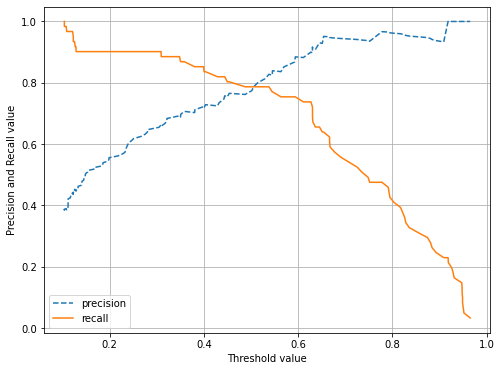

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold 값으로, y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

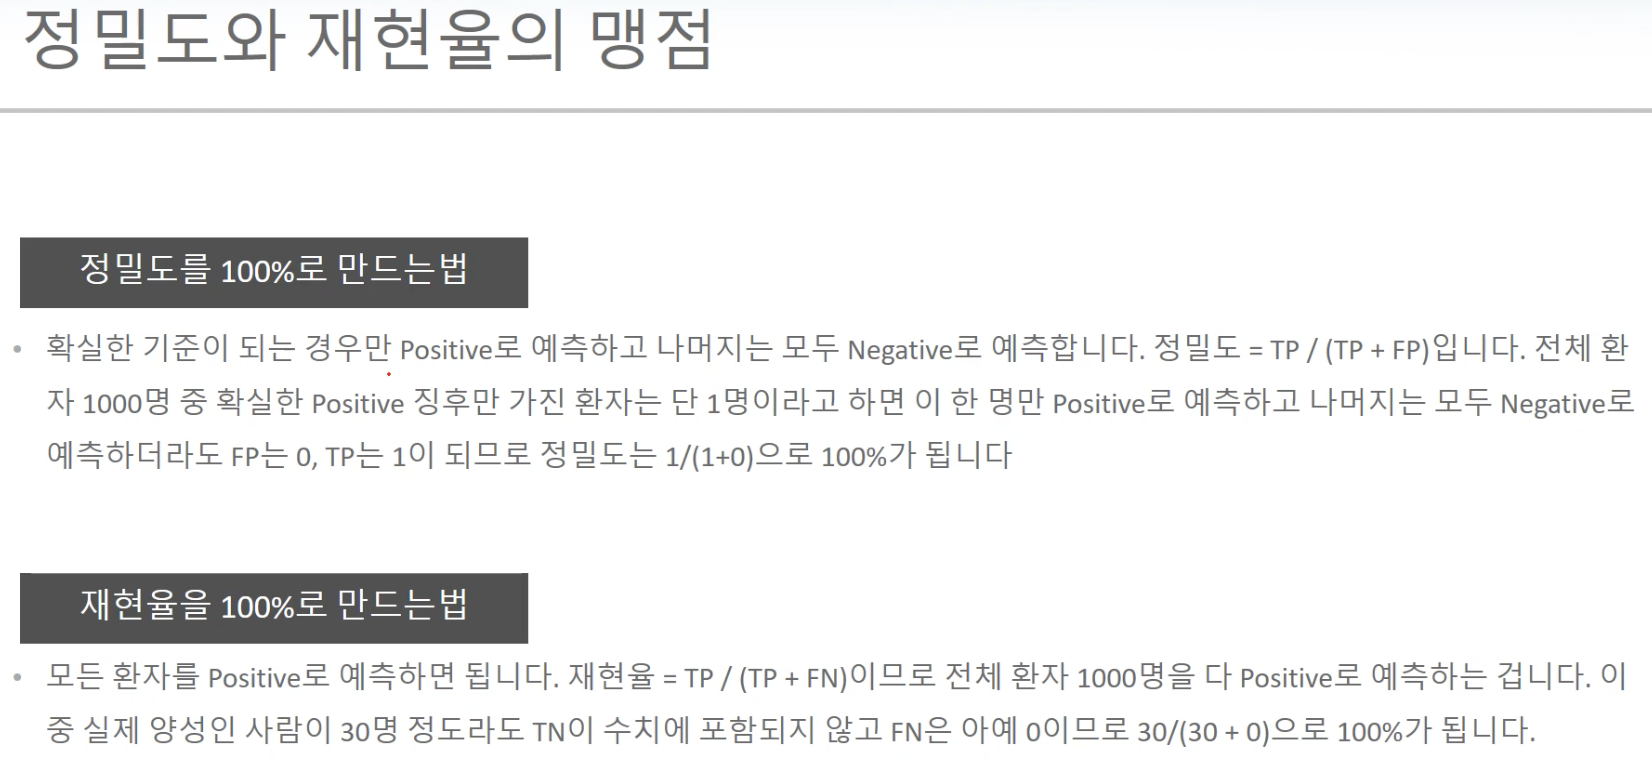

# **F1 Score**

*   정밀도와 재현율을 결합한 지표
*   정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.



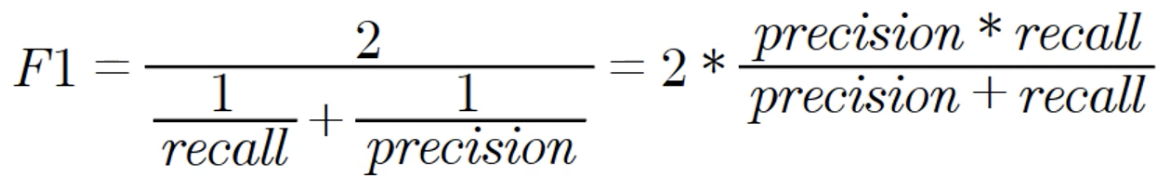

In [38]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [40]:
def get_clf_eval(ytest, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  # F1 스코어 추가
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1: 0.7727
-----------------------------------------
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1: 0.7840
-----------------------------------------
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1: 0.7805
-----------------------------------------
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1: 0.7931
-----------------------------------------
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1: 0.8036
-----------------------------------------


# **ROC Curve와 AUC**

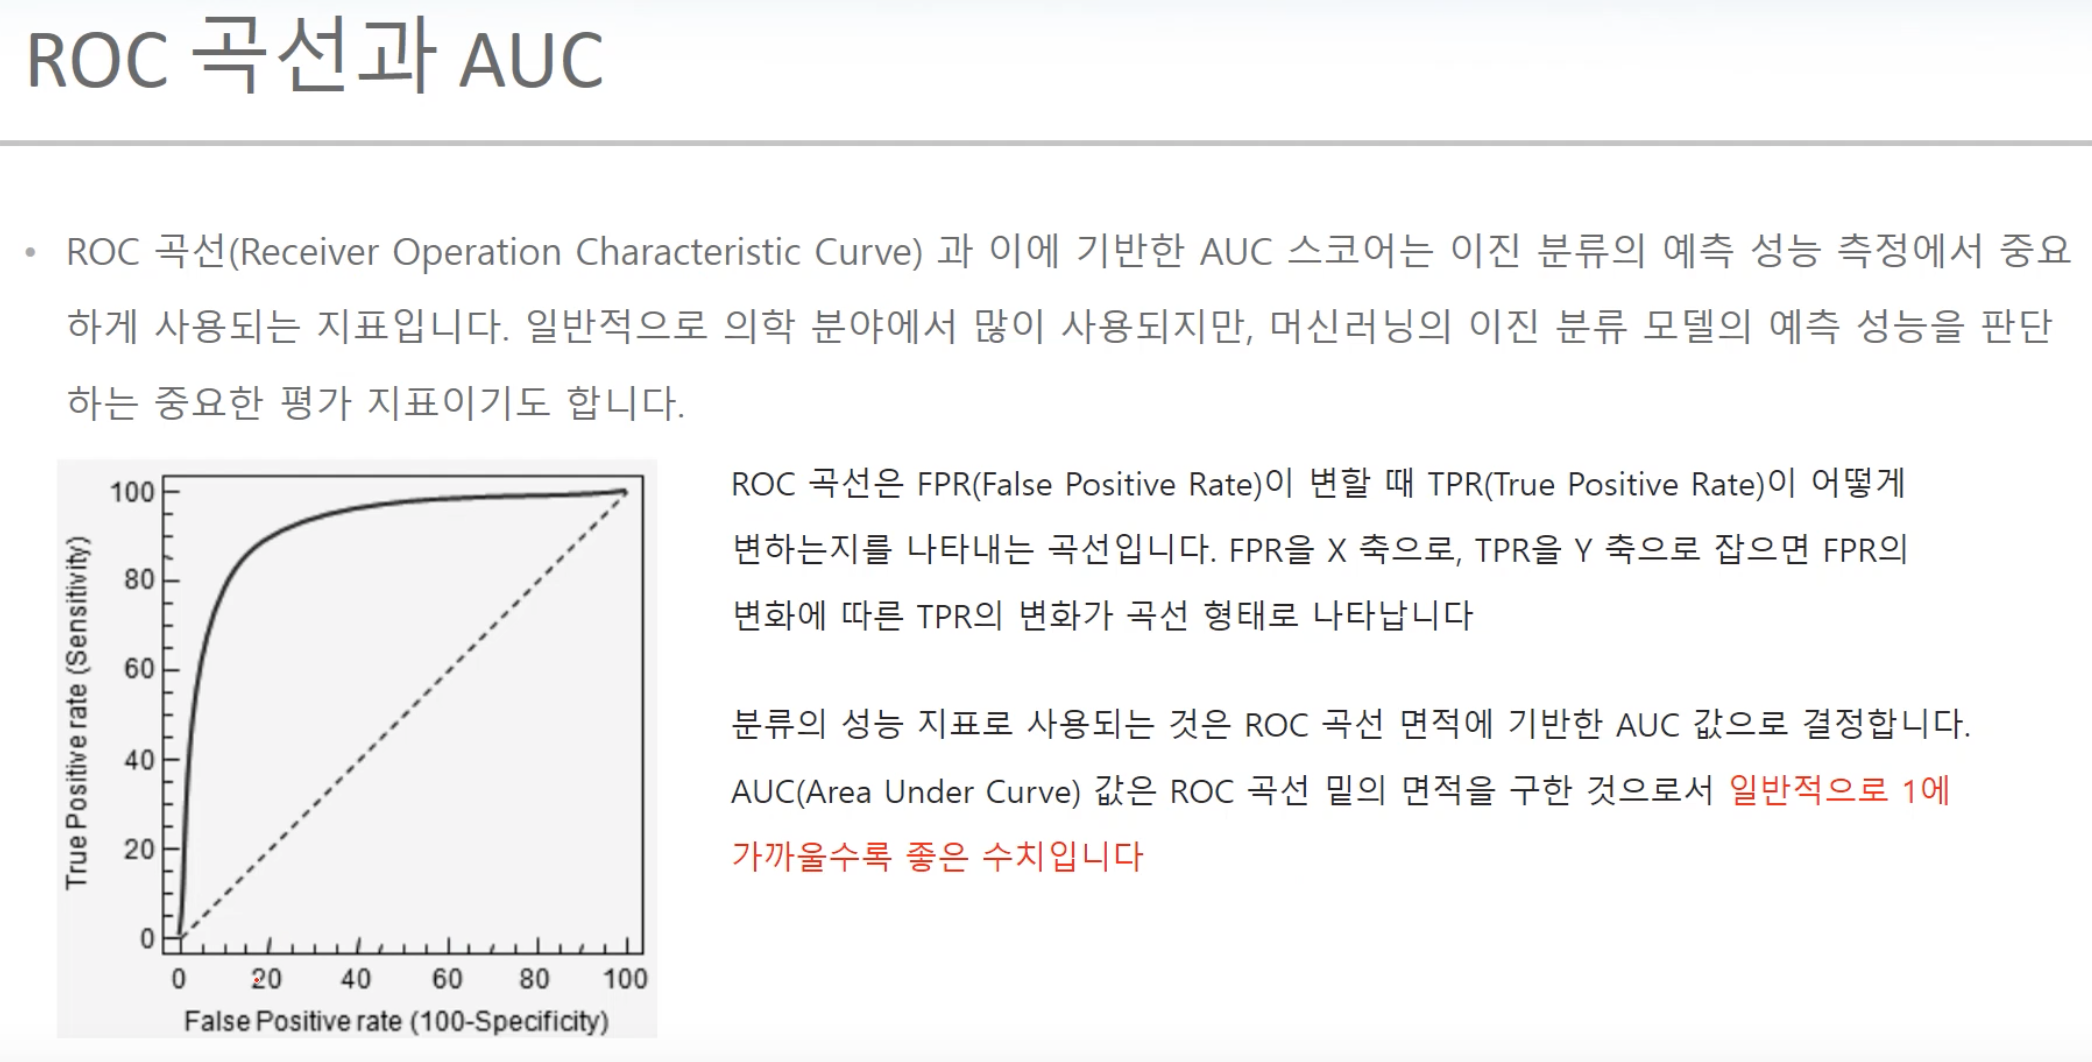

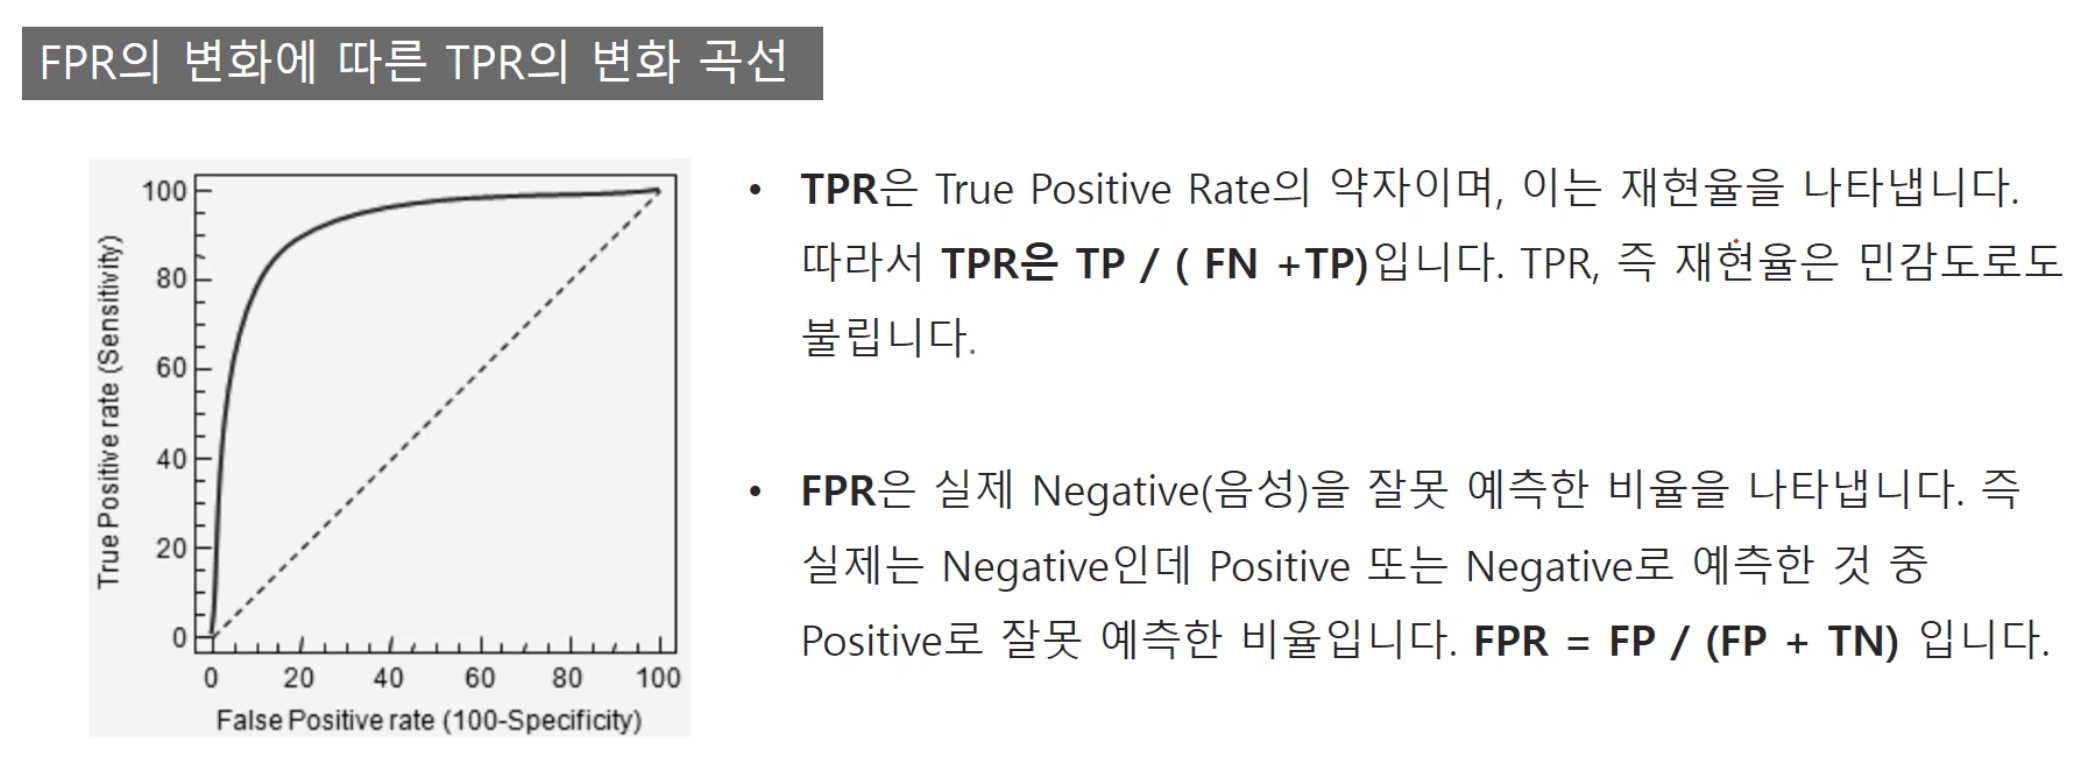



*   사이킷런은 임계값에 따른 ROC 곡선 데이터를 roc_curve()로, AUC 스코어를 roc_auc_score() 함수로 제공



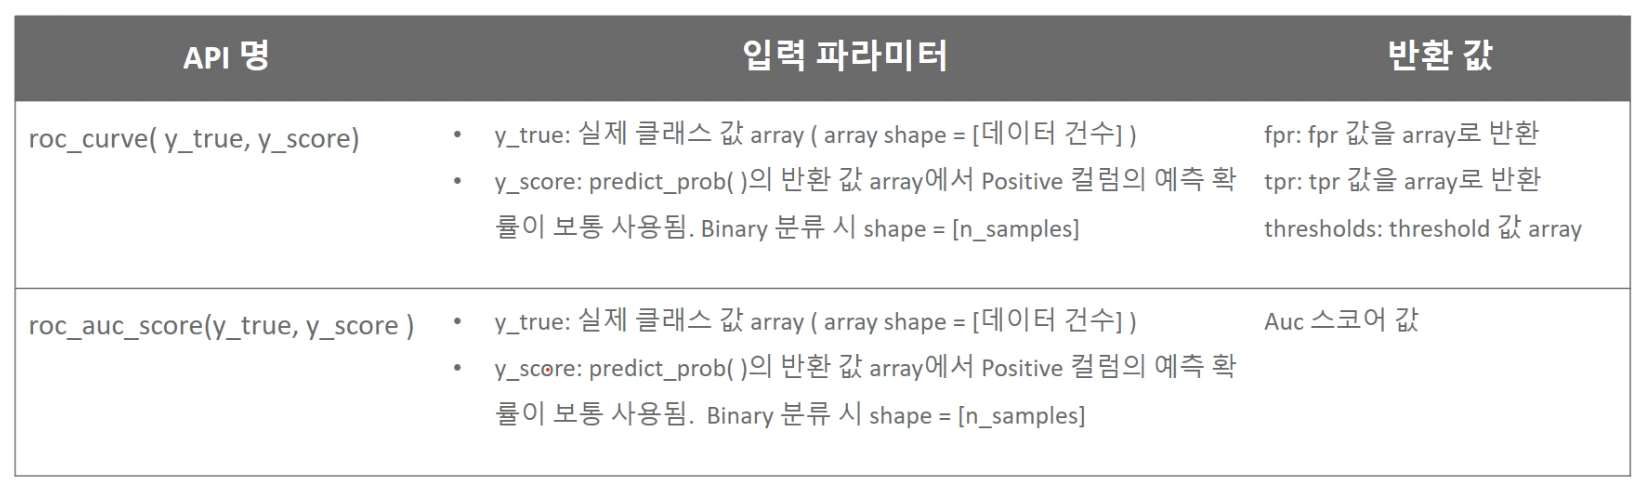

In [42]:
from sklearn.metrics import roc_curve
# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

print("thresholds.shape: ", thresholds.shape)

thresholds.shape:  (55,)


In [43]:
# 반환된 입계값 배열 로우가 55건이므로 샘플로 10건만 추출하되, 임계값을 5 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 5)
print("샘플 추출을 위한 임계값 배열의 index 10개:", thr_index)
print("샘플용 10개의 임계값: ", np.round(thresholds[thr_index], 2))

샘플 추출을 위한 임계값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임계값:  [1.97 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]


In [44]:
# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print("샘플 임계값별 FPR: ", np.round(fprs[thr_index], 3))
print("샘플 임계값별 TPR: ", np.round(tprs[thr_index], 3))

샘플 임계값별 FPR:  [0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
샘플 임계값별 TPR:  [0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


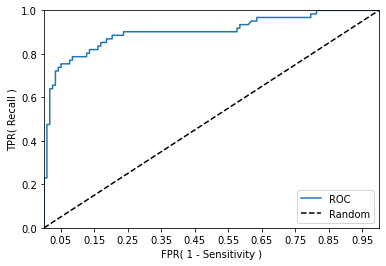

In [46]:
def roc_curve_plot(y_test, pred_proba_c1):
  # 임계값에 따른 FPR, TPR 값을 반환 받음.
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

  # ROC Curve를 plot 곡선으로 그림.
  plt.plot(fprs, tprs, label='ROC')
  # 가운데 대각선 직선을 그림.
  plt.plot([0, 1], [0, 1], 'k--', label='Random')

  # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  plt.xlim(0, 1)
  plt.ylim(0, 1)
  plt.xlabel('FPR( 1 - Sensitivity )')
  plt.ylabel('TPR( Recall )')
  plt.legend()
  plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [49]:
from sklearn.metrics import roc_auc_score

### roc_auc_score(y_test, y_score) 에서 y_score는 predict_proba()로 호출된 예측 확률 ndarray 중 Positive 열에 해당하는 ndarray입니다.

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


In [50]:
def get_clf_eval(ytest, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))